# ADULT INCOME PREDICTION USING LOGISTIC REGRESSION

### Import the required  values

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

### Read the CSV file

In [177]:
adult =pd.read_csv('Adult.csv')
adult1 = adult

### Understanding the DataSet

In [178]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


###  As null values are not present in the set no need for null value treatment 

In [179]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Check the total number of null values in the dataframe

In [180]:
adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Check the categorical values in the dataframe using "unique()"

In [181]:
#remove the '?'
#drop the NaN values in the dataframe
# df  = adult.replace('?',np.nan).dropna()
# df.head()
adult.income.unique()
df = adult

### Replace the label values to '1' and '0'

In [182]:
df = df.replace('<=50K', 1)
df = df.replace('>50K', 0)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,1


### Checking the values of each column

In [183]:
df.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [184]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [185]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [186]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [187]:
df['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [188]:
df['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [189]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [190]:
df['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

### create dummies for categorical value labels

In [191]:
dummies = pd.get_dummies(df[['workclass','education','marital-status','occupation','relationship','race','gender','native-country']],drop_first=True)
dummies.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### create a new dataframe "df1" for categorical valued columns

In [192]:
df1 = df.drop(['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income'],axis = 1)
df1.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


### Normalise new dataframe "df1" to "df1_norm" i.e., numerical value labels

In [193]:
df1_norm = (df1-df1.min())/(df1.max()-df1.min())
df1_norm.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918


### create a new dataframe as "df2" and concatenate dataframes with 'df1'(dummies) and 'df1_norm'(normalised data)

In [194]:
df2 = pd.concat([df1_norm,dummies],axis = 1)
df2.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### concat the dataframe with the label

In [195]:
df3 = pd.concat([df2,df['income']],axis =1)
# df3 = pd.concat([df3, adult['age']],axis = 1)
df3.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


### Find the count, mean, min, std, etc. values for each column of the new dataframe "df3"

In [196]:
df3.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,...,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.296487,0.120004,0.605206,0.010791,0.020088,0.402269,0.029319,0.064207,0.000205,0.694198,...,0.003767,0.000430,0.002355,0.001331,0.000614,0.000553,0.897424,0.001761,0.000471,0.760718
std,0.187815,0.071445,0.171398,0.074521,0.092517,0.126443,0.168701,0.245124,0.014307,0.460751,...,0.061263,0.020731,0.048467,0.036457,0.024776,0.023506,0.303407,0.041925,0.021695,0.426649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071216,0.533333,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,0.273973,0.112210,0.600000,0.000000,0.000000,0.397959,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.424658,0.152462,0.733333,0.000000,0.000000,0.448980,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Draw a box plot to know the inflation of income based on age

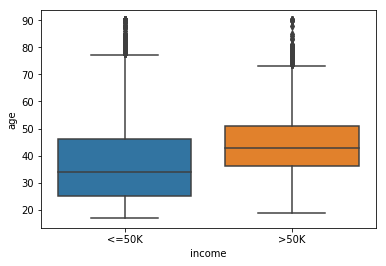

In [197]:
sns.boxplot(x = 'income', y ='age', data = adult)

### create a new dataframe by droping the value of 'income' variable

In [198]:
d=df3['income']
dd=df3.drop(['income'],axis=1)

### split the data into train and test data

In [199]:
X_train, X_test, y_train, y_test = train_test_split(dd,d, train_size=0.7,test_size=0.3,random_state=100)
X_train.shape

(34189, 100)

### import statsmodel.api to find the p-value, std error etc.

In [200]:
import statsmodels.api as sm

### list all the columns in the dataframe 'df3'

In [201]:
list(df3.columns)

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupati

### Importing matplotlib and seaborn

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  Let's see the correlation matrix 

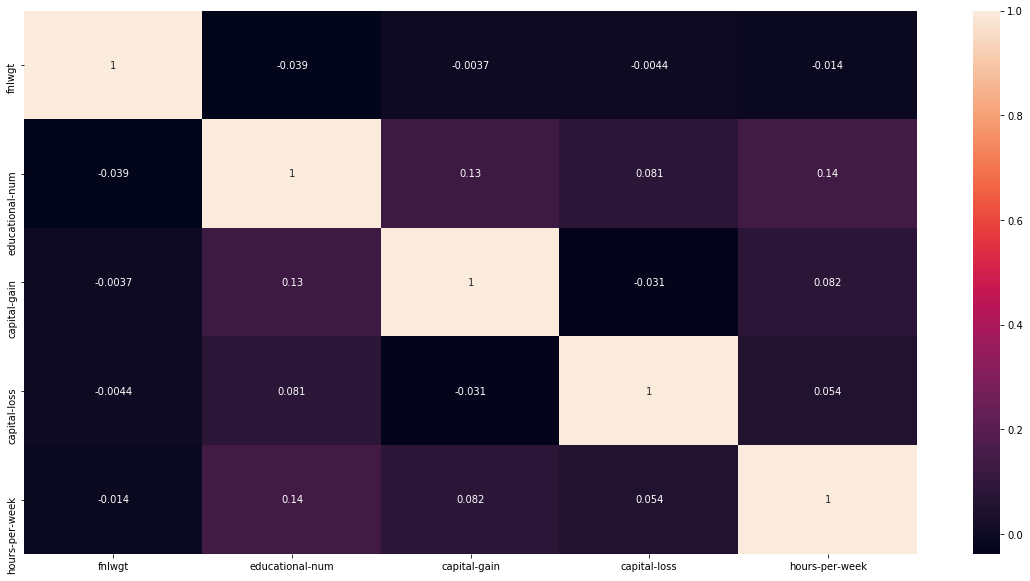

In [203]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df3[['fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']].corr(),annot = True)

###  Build the model

In [204]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 income   No. Observations:                34189
Model:                            GLM   Df Residuals:                    34090
Model Family:                Binomial   Df Model:                           98
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10755.
Date:                Mon, 07 Jan 2019   Deviance:                       21511.
Time:                        15:40:12   Pearson chi2:                 3.20e+05
No. Iterations:                    21   Covariance Type:             nonrobust
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         8.9843      0.428     20.995      0.000       8.146       9.823
age                                          -1.8534      0.118    -15.720      0.000      -2.084      -1.622
fnlwgt                                       -1.2161      0.250     -4.863      0.000      -1.706      -0.726
educational-num                              -1.6731      0.185     -9.068      0.000      -2.035      -1.312
capital-gain                                -31.4410      1.011    -31.109      0.000     -33.422     -29.460
capital-loss                                 -2.8676      0.157    -18.226      0.000      -3.176      -2.559
hours-per-week                               -2.8894      0.154    -18.805      0.000      -3.191      -2.588
workclass_Federal-gov                        -0.9879      0.126     -7.825      0.000      -1.235      -0.740
workclass_Local-gov                          -0.3496      0.115     -3.029      0.002      -0.576      -0.123
workclass_Never-worked                       18.2662   1.45e+04      0.001      0.999   -2.84e+04    2.84e+04
workclass_Private                            -0.4488      0.100     -4.470      0.000      -0.646      -0.252
workclass_Self-emp-inc                       -0.5654      0.124     -4.555      0.000      -0.809      -0.322
workclass_Self-emp-not-inc                    0.0912      0.112      0.815      0.415      -0.128       0.311
workclass_State-gov                          -0.0170      0.126     -0.135      0.892      -0.264       0.230
workclass_Without-pay                        -0.3166      0.798     -0.397      0.691      -1.880       1.247
education_11th                               -0.1061      0.196     -0.542      0.588      -0.490       0.278
education_12th                                0.0131      0.272      0.048      0.962      -0.520       0.546
education_1st-4th                             0.1909      0.492      0.388      0.698      -0.773       1.155
education_5th-6th                             0.0672      0.336      0.200      0.842      -0.591       0.725
education_7th-8th                             0.2700      0.240      1.127      0.260      -0.200       0.740
education_9th                                -0.0218      0.248     -0.088      0.930      -0.507       0.464
education_Assoc-acdm                         -0.7410      0.145     -5.126      0.000      -1.024      -0.458
education_Assoc-voc                          -0.7861      0.140     -5.596      0.000      -1.061      -0.511
education_Bachelors                          -1.1040      0.122     -9.067      0.000      -1.343      -0.865
education_Doctorate                          -1.7393      0.171    -10.172      0.000      -2.074      -1.404
education_HS-grad                            -0.4760      0.132     -3.617      0.

### Removing the columns in the 'df3' dataframe which  have higher p-value of >0.05

In [205]:
finald=df3.drop(['native-country_Yugoslavia','native-country_Trinadad&Tobago','native-country_Thailand','native-country_Taiwan',
         'native-country_Scotland','native-country_Puerto-Rico','native-country_Portugal','native-country_Poland','native-country_Philippines',
         'native-country_Peru','native-country_Outlying-US(Guam-USVI-etc)','native-country_Nicaragua','native-country_Laos',
         'native-country_Japan','native-country_Jamaica','native-country_Iran','native-country_India','native-country_Hungary',
         'native-country_Hong','native-country_Honduras','native-country_Holand-Netherlands','native-country_Haiti','native-country_Guatemala',
        'native-country_Greece','native-country_Germany','native-country_France','native-country_El-Salvador','native-country_Ecuador',
         'native-country_Dominican-Republic','native-country_Cuba','native-country_Cuba','native-country_China','native-country_Canada',
         'native-country_Cambodia','race_Black','relationship_Unmarried','relationship_Own-child','occupation_Transport-moving',
         'occupation_Priv-house-serv','occupation_Machine-op-inspct','occupation_Armed-Forces','marital-status_Widowed',
         'marital-status_Separated','marital-status_Married-spouse-absent','education_Preschool','education_9th','education_7th-8th',
         'education_5th-6th','education_1st-4th','education_12th','education_11th','workclass_Without-pay','workclass_State-gov',
         'workclass_Self-emp-not-inc','workclass_Never-worked'],axis=1)

### check the 'finaldf' values after removing

In [206]:
finald.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,gender_Male,native-country_Columbia,native-country_England,native-country_Ireland,native-country_Italy,native-country_Mexico,native-country_South,native-country_United-States,native-country_Vietnam,income
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


### create a new dataframe 'dd' by dropping the 'income' in the 'finald' dataframe

In [207]:
d=finald['income']
dd=finald.drop(['income'],axis=1)

### split the dataframe 'dd' to train and test data


In [208]:
X_train, X_test, y_train, y_test = train_test_split(dd,d, train_size=0.7,test_size=0.3,random_state=100)
X_train.shape

(34189, 46)

### build the model on the data to find p-value

In [209]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 income   No. Observations:                34189
Model:                            GLM   Df Residuals:                    34142
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10798.
Date:                Mon, 07 Jan 2019   Deviance:                       21596.
Time:                        15:40:13   Pearson chi2:                 3.29e+05
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 8.7814      0.285     30.771      0.000       8.222       9.341
age                                  -1.9009      0.115    -16.561      0.000      -2.126      -1.676
fnlwgt                               -1.2125      0.248     -4.884      0.000      -1.699      -0.726
educational-num                      -2.6367      0.697     -3.780      0.000      -4.004      -1.270
capital-gain                        -31.4272      1.008    -31.190      0.000     -33.402     -29.452
capital-loss                         -2.8496      0.157    -18.172      0.000      -3.157      -2.542
hours-per-week                       -2.9224      0.151    -19.351      0.000      -3.218      -2.626
workclass_Federal-gov                -1.0540      0.099    -10.627      0.000      -1.248      -0.860
workclass_Local-gov                  -0.4009      0.078     -5.161      0.000      -0.553      -0.249
workclass_Private                    -0.4958      0.049    -10.091      0.000      -0.592      -0.399
workclass_Self-emp-inc               -0.6152      0.090     -6.870      0.000      -0.791      -0.440
education_Assoc-acdm                 -0.3791      0.314     -1.208      0.227      -0.994       0.236
education_Assoc-voc                  -0.4841      0.267     -1.812      0.070      -1.008       0.039
education_Bachelors                  -0.6751      0.349     -1.934      0.053      -1.359       0.009
education_Doctorate                  -1.1251      0.507     -2.221      0.026      -2.118      -0.132
education_HS-grad                    -0.2969      0.172     -1.727      0.084      -0.634       0.040
education_Masters                    -0.8612      0.399     -2.160      0.031      -1.643      -0.080
education_Prof-school                -1.1615      0.458     -2.537      0.011      -2.059      -0.264
education_Some-college               -0.4708      0.215     -2.185      0.029      -0.893      -0.049
marital-status_Married-AF-spouse     -2.1081      0.507     -4.160      0.000      -3.101      -1.115
marital-status_Married-civ-spouse    -2.1632      0.087    -24.746      0.000      -2.335      -1.992
marital-status_Never-married          0.6196      0.077      8.060      0.000       0.469       0.770
occupation_Adm-clerical              -0.2649      0.079     -3.358      0.001      -0.419      -0.110
occupation_Craft-repair              -0.2901      0.063     -4.617      0.000      -0.413      -0.167
occupation_Exec-managerial           -1.0315      0.065    -15.874      0.000      -1.159      -0.904
occupation_Farming-fishing            0.9226      0.129      7.133      0.000       0.669       1.176
occupation_Handlers-cleaners          0.4912      0.132      3.717      0.000       0.232       0.750
occupation_Other-service              0.5606      0.107      5.248      0.000       0.351       0.770


### removing the columns which have p-value > 0.01

In [210]:
finald1=finald.drop(['native-country_Vietnam','native-country_United-States','native-country_Italy','native-country_Ireland',
                    'native-country_England','race_Other','education_Some-college','education_Prof-school','education_Masters',
                    'education_HS-grad','education_Doctorate','education_Bachelors','education_Assoc-voc','education_Assoc-acdm',
                    'race_Asian-Pac-Islander','native-country_South'],axis=1)

### find the columns in 'finald1' dataframe after removing

In [211]:
finald1.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Sales,occupation_Tech-support,relationship_Not-in-family,relationship_Other-relative,relationship_Wife,race_White,gender_Male,native-country_Columbia,native-country_Mexico,income
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### create a new dataframe by dropping 'income' from 'finald1' dataframe

In [212]:
d=finald1['income']
dd=finald1.drop(['income'],axis=1)

### split the dataframe 'dd' into test and train data

In [213]:
X_train, X_test, y_train, y_test = train_test_split(dd,d, train_size=0.7,test_size=0.3,random_state=100)
X_train.shape

(34189, 30)

### build the model on the data to find p-value

In [214]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 income   No. Observations:                34189
Model:                            GLM   Df Residuals:                    34158
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10825.
Date:                Mon, 07 Jan 2019   Deviance:                       21650.
Time:                        15:40:13   Pearson chi2:                 3.11e+05
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 9.0266      0.168     53.668      0.000       8.697       9.356
age                                  -1.9328      0.113    -17.046      0.000      -2.155      -1.711
fnlwgt                               -1.1342      0.247     -4.599      0.000      -1.617      -0.651
educational-num                      -4.0766      0.133    -30.640      0.000      -4.337      -3.816
capital-gain                        -31.4282      1.007    -31.216      0.000     -33.401     -29.455
capital-loss                         -2.8442      0.156    -18.191      0.000      -3.151      -2.538
hours-per-week                       -2.9422      0.151    -19.537      0.000      -3.237      -2.647
workclass_Federal-gov                -1.0444      0.099    -10.584      0.000      -1.238      -0.851
workclass_Local-gov                  -0.3843      0.077     -5.006      0.000      -0.535      -0.234
workclass_Private                    -0.4860      0.049     -9.964      0.000      -0.582      -0.390
workclass_Self-emp-inc               -0.6055      0.089     -6.786      0.000      -0.780      -0.431
marital-status_Married-AF-spouse     -2.1094      0.505     -4.177      0.000      -3.099      -1.120
marital-status_Married-civ-spouse    -2.1709      0.087    -24.894      0.000      -2.342      -2.000
marital-status_Never-married          0.6117      0.077      7.996      0.000       0.462       0.762
occupation_Adm-clerical              -0.2686      0.079     -3.421      0.001      -0.422      -0.115
occupation_Craft-repair              -0.2920      0.063     -4.661      0.000      -0.415      -0.169
occupation_Exec-managerial           -1.0406      0.064    -16.158      0.000      -1.167      -0.914
occupation_Farming-fishing            0.9259      0.129      7.166      0.000       0.673       1.179
occupation_Handlers-cleaners          0.5007      0.132      3.787      0.000       0.242       0.760
occupation_Other-service              0.5656      0.107      5.309      0.000       0.357       0.774
occupation_Prof-specialty            -0.9103      0.071    -12.893      0.000      -1.049      -0.772
occupation_Protective-serv           -0.6888      0.114     -6.017      0.000      -0.913      -0.464
occupation_Sales                     -0.4757      0.068     -6.988      0.000      -0.609      -0.342
occupation_Tech-support              -0.8900      0.101     -8.839      0.000      -1.087      -0.693
relationship_Not-in-family           -0.4435      0.082     -5.440      0.000      -0.603      -0.284
relationship_Other-relative           0.5959      0.212      2.807      0.005       0.180       1.012
relationship_Wife                    -1.0203      0.097    -10.517      0.000      -1.210      -0.830
race_White                           -0.2205      0.057     -3.893      0.000      -0.332      -0.109


### plot the correlation map

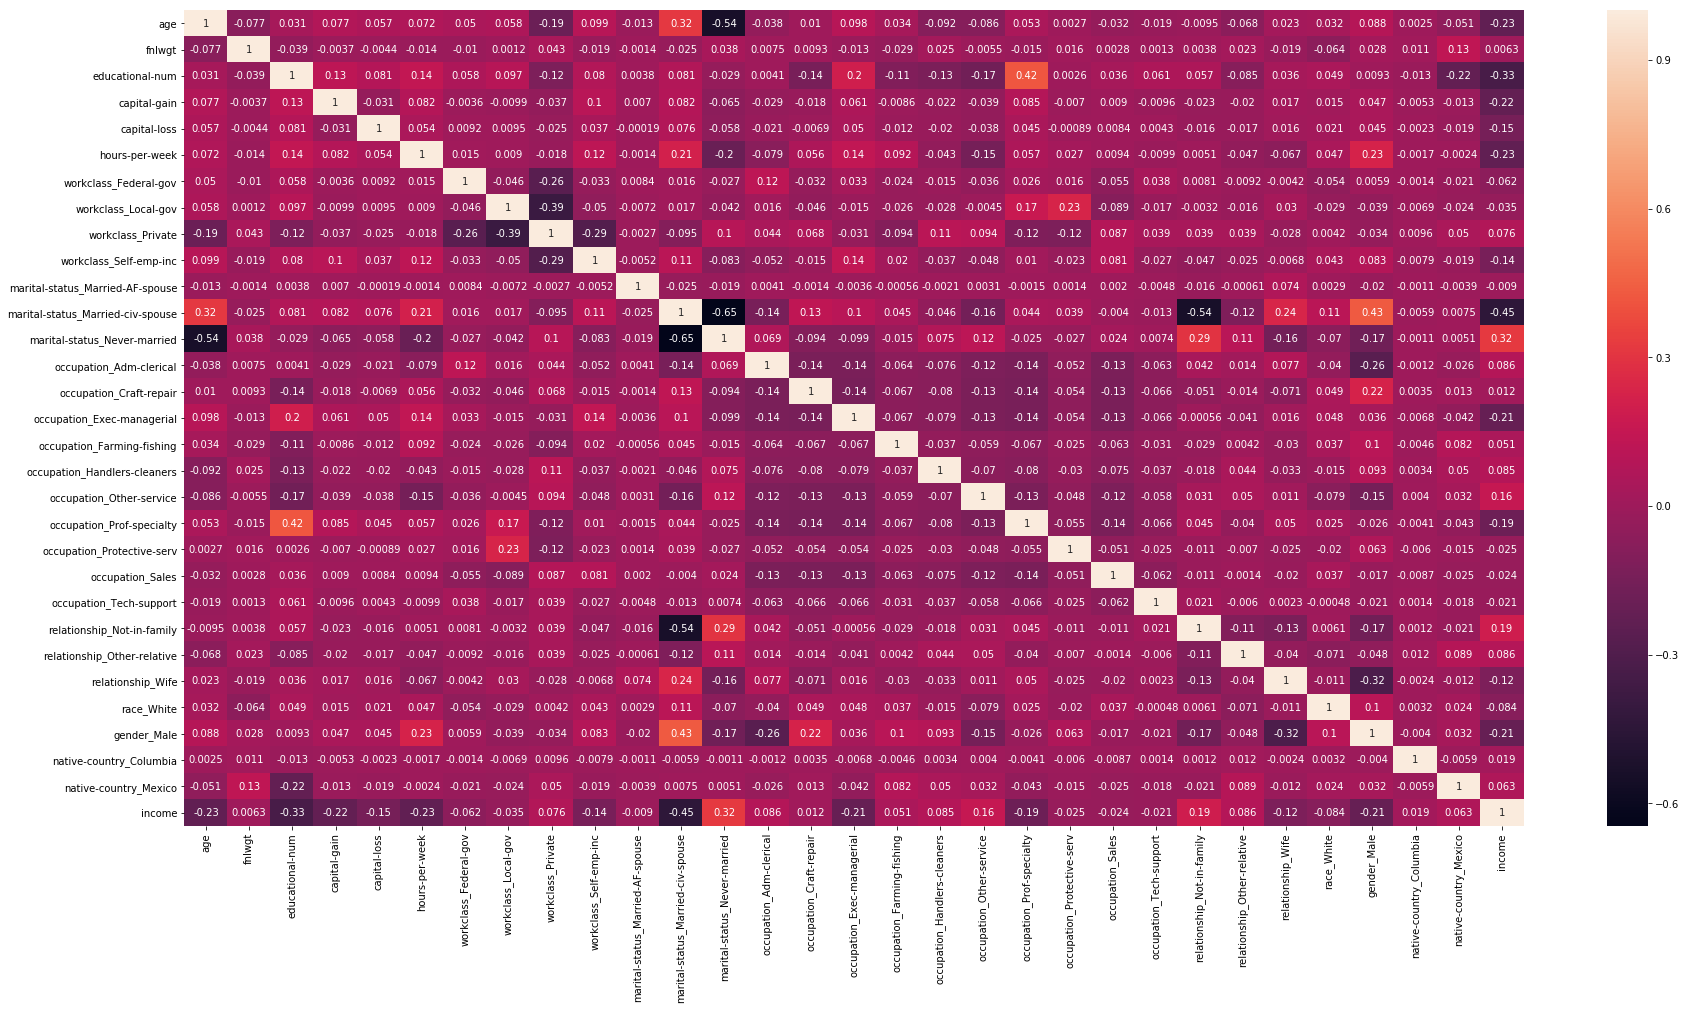

In [215]:
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(finald1.corr(),annot = True)

### UDF for calculating vif value

In [216]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

### print the  columns of 'finald1' dataframe

In [217]:
col=finald1.columns
col

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'occupation_Adm-clerical',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Wife', 'race_White',
       'gender_Male', 'native-country_Columbia', 'native-country_Mexico',
       'income'],
      dtype='object')

### Calculating Vif value

In [218]:
vif_cal(input_data=finald1, dependent_col='income')

,Var,Vif
2,educational-num,16.04
5,hours-per-week,11.12
0,age,4.43
1,fnlwgt,3.66
4,capital-loss,1.07
3,capital-gain,1.06
10,marital-status_Married-AF-spouse,1.02
28,native-country_Columbia,1.00
20,occupation_Protective-serv,0.26
29,native-country_Mexico,0.21


### create a new dataframe 'finald2' by removing the columns which have higher vif value from 'finald1' dataframe

In [219]:
finald2=finald1.drop(['educational-num','hours-per-week','marital-status_Married-civ-spouse','relationship_Not-in-family','marital-status_Married-AF-spouse','fnlwgt'],axis=1)

### create a dataframe 'dd' by removing 'income' column from 'finald2' dataframe

In [220]:
d=finald2['income']
dd=finald2.drop(['income'],axis=1)

### split the dataframe 'dd' into train and test data

In [221]:
X_train, X_test, y_train, y_test = train_test_split(dd,d, train_size=0.7,test_size=0.3,random_state=100)
X_train.shape

(34189, 24)

### build the model on the data to find p-value

In [222]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 income   No. Observations:                34189
Model:                            GLM   Df Residuals:                    34164
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12111.
Date:                Mon, 07 Jan 2019   Deviance:                       24222.
Time:                        15:40:23   Pearson chi2:                 2.17e+05
No. Iterations:                     7   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            4.5292      0.103     43.909      0.000       4.327       4.731
age                             -1.1618      0.102    -11.379      0.000      -1.362      -0.962
capital-gain                   -32.7539      0.975    -33.596      0.000     -34.665     -30.843
capital-loss                    -2.9773      0.146    -20.430      0.000      -3.263      -2.692
workclass_Federal-gov           -0.9342      0.093    -10.020      0.000      -1.117      -0.751
workclass_Local-gov             -0.3689      0.072     -5.116      0.000      -0.510      -0.228
workclass_Private               -0.3413      0.045     -7.536      0.000      -0.430      -0.253
workclass_Self-emp-inc          -0.6752      0.084     -8.085      0.000      -0.839      -0.512
marital-status_Never-married     1.9194      0.059     32.583      0.000       1.804       2.035
occupation_Adm-clerical         -0.5416      0.074     -7.345      0.000      -0.686      -0.397
occupation_Craft-repair         -0.3481      0.059     -5.859      0.000      -0.465      -0.232
occupation_Exec-managerial      -1.6935      0.058    -29.114      0.000      -1.808      -1.580
occupation_Farming-fishing       0.5312      0.121      4.388      0.000       0.294       0.768
occupation_Handlers-cleaners     0.6460      0.126      5.124      0.000       0.399       0.893
occupation_Other-service         0.6242      0.102      6.138      0.000       0.425       0.823
occupation_Prof-specialty       -1.9209      0.060    -32.067      0.000      -2.038      -1.803
occupation_Protective-serv      -0.9412      0.107     -8.834      0.000      -1.150      -0.732
occupation_Sales                -0.9603      0.063    -15.329      0.000      -1.083      -0.838
occupation_Tech-support         -1.3444      0.094    -14.295      0.000      -1.529      -1.160
relationship_Other-relative      1.0849      0.199      5.460      0.000       0.695       1.474
relationship_Wife               -2.3667      0.081    -29.374      0.000      -2.525      -2.209
race_White                      -0.2649      0.053     -5.021      0.000      -0.368      -0.161
gender_Male                     -2.0479      0.058    -35.088      0.000      -2.162      -1.934
native-country_Columbia          1.4735      0.572      2.578      0.010       0.353       2.594
native-country_Mexico            1.4508      0.207      7.012      0.000       1.045       1.856
================================================================================================
"""

### Calculate the 'vif'( vector inflation factor ) value of the columns of 'finald2' dataframe

In [223]:
vif_cal(input_data=finald2, dependent_col='income')

,Var,Vif
0,age,3.68
2,capital-loss,1.06
1,capital-gain,1.05
22,native-country_Columbia,1.00
15,occupation_Protective-serv,0.26
23,native-country_Mexico,0.20
11,occupation_Farming-fishing,0.17
18,relationship_Other-relative,0.16
3,workclass_Federal-gov,0.13
17,occupation_Tech-support,0.13


### Let's run the model using the selected variables

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predicted probabilities

In [225]:
y_pred = logsk.predict_proba(X_test)

### Converting y_pred to a dataframe which is an array

In [226]:
y_pred_df = pd.DataFrame(y_pred)

### Converting to column dataframe and see the probability for getting income '<=50K'

In [251]:
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1.head()

,1
0,0.857033
1,0.979531
2,0.983449
3,0.985210
4,0.828203


### Converting y_test to column dataframe and see the probability for getting income '>50K'

In [252]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,income
12393,0
48701,1
17918,1
11352,1
36198,1


### Reset the indices of 'y_pred1' and 'y_test'

In [253]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

### Appending 'y_test_df' and 'y_pred_1'

In [254]:
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

,income,1
0,0,0.857033
1,1,0.979531
2,1,0.983449
3,1,0.985210
4,1,0.828203


### Rename 'y_pred_final' as 'prob'

In [255]:
y_pred_final= y_pred_final.rename(columns={ 1 : 'Prob'})

### Create a column  'predicted' which gives '1' if the income is '>=50K'

In [232]:
y_pred_final['predicted'] = y_pred_final.Prob.map( lambda x: 1 if x >= 0.5 else 0)
# Let's see the head
y_pred_final.head()

,income,Prob,predicted
0,0,0.857033,1
1,1,0.979531,1
2,1,0.983449,1
3,1,0.985210,1
4,1,0.828203,1


### import sklearn to find the confusion matrix

In [233]:
from sklearn import metrics

### Confusion matrix for 'y_pred_final.income' and ' y_pred_final.predicted'

In [234]:
confusion = metrics.confusion_matrix( y_pred_final.income, y_pred_final.predicted )
confusion

array([[ 1863,  1669],
       [  886, 10235]], dtype=int64)

### Let's check the overall accuracy.

In [235]:
metrics.accuracy_score( y_pred_final.income, y_pred_final.predicted)

0.8256329761823518

### Find the TP,TN,FP,FN

In [236]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Let's see the sensitivity of our logistic regression model

In [237]:
TP / float(TP+FN)

0.6777009821753365

### Let us calculate specificity

In [238]:
TN / float(TN+FP)

0.8597950268817204

### Calculate false postive rate

In [239]:
print(FP/ float(TN+FP))

0.14020497311827956


### Positive predictive value 

In [240]:
print (TP / float(TP+FP))

0.5274631936579841


### Negative predictive value

In [241]:
print (TN / float(TN+ FN))

0.9203309054941102


### Function to draw the ROC cure

In [242]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

### draw ROC curve for 'income' and 'predicted'

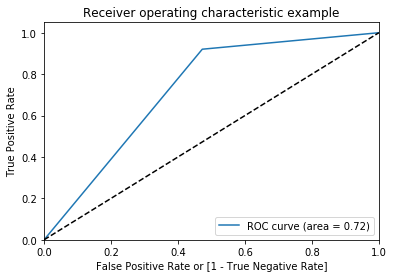

(array([0.        , 0.47253681, 1.        ]),
 array([0.        , 0.92033091, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [243]:
draw_roc(y_pred_final.income, y_pred_final.predicted)

### Let's create columns with different probability cutoffs 

In [244]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,income,Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.857033,1,1,1,1,1,1,1,1,1,1,0
1,1,0.979531,1,1,1,1,1,1,1,1,1,1,1
2,1,0.983449,1,1,1,1,1,1,1,1,1,1,1
3,1,0.985210,1,1,1,1,1,1,1,1,1,1,1
4,1,0.828203,1,1,1,1,1,1,1,1,1,1,0


### Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [245]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.income, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.758957  0.000000  1.000000
0.1   0.1  0.779704  0.086920  0.999730
0.2   0.2  0.795741  0.162231  0.996943
0.3   0.3  0.805705  0.225934  0.989839
0.4   0.4  0.817853  0.361552  0.962773
0.5   0.5  0.825633  0.527463  0.920331
0.6   0.6  0.820856  0.614383  0.886431
0.7   0.7  0.806115  0.719989  0.833468
0.8   0.8  0.745035  0.855606  0.709918
0.9   0.9  0.632840  0.953567  0.530977


### Let's plot accuracy sensitivity and specificity for various probabilities.

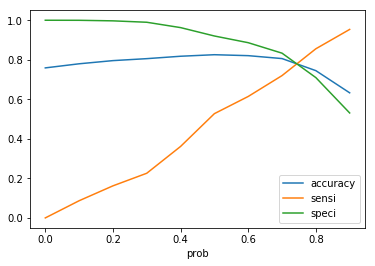

In [250]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### Check the predicted values if they are >0.75

In [256]:
y_pred_final['final_predicted'] = y_pred_final.Prob.map( lambda x: 1 if x > 0.75 else 0)
y_pred_final.head()

,income,Prob,final_predicted
0,0,0.857033,1
1,1,0.979531,1
2,1,0.983449,1
3,1,0.985210,1
4,1,0.828203,1


### Let's check the overall accuracy.

In [248]:
metrics.accuracy_score( y_pred_final.income, y_pred_final.final_predicted)

0.7857776564526036

### check the confusion matrix for 'income' and 'predicted'

In [249]:
metrics.confusion_matrix( y_pred_final.income, y_pred_final.final_predicted )

array([[2757,  775],
       [2364, 8757]], dtype=int64)